# Revenue Analysis for Legal Practice
***
## 1. Introduction
This data analysis challenge is a part of the Data Analyst Accelerator Programme (July 2022 Intake) coordinated by Gen Infiniti Academy, Singapore. 

## 2. Objectives from the data analysis
The objectives of the data analysis are as follows:
- How to forecast revenues for the year?
- Strategies to adopt to reach revenue targets
- Performance in meeting the KPI
- Types of cases that brings in the most revenues
    - If there is any, who can take the case/ is there a distinction in skillsets/domain of each lawyers?
- How productive are the lawyers?
    - Does time correlate with their apportioned amount?

## 3. Variables definitions
Dataset were provided and below are some of the definitions for the variables:
- Apportionment
    - The legal term apportionment, also called delimitation, is in general the distribution or allotment of proper shares, though may have different meanings in different contexts. Apportionment can refer to estate, the amount of compensation received by a worker and in respect of time.
- Final Apportionment Amount
    - Revenue earned by each lawyer
- Case Type
    - Unable to provide further details - confidential
- Hours
    - Billable time clocked by each lawyer
    - Daily target = 10 hours (value 1 is equivalent to 10 hours)
- Cost to Company (CTC)
    - Cost to Company (CTC) is the yearly expenditure that a company spends on an employee. Each employee spend depends on their salary and variable.
    - CTC = Gross Salary + Other Benefits
    - In this dataset, CTC = Monthly Salary
        - Revenue targets are calculated based on multipliers of their salary

### 4. Importing & Pre-Processing Data
Prior to analysing the data, we will have to import the packages and the dataset followed by cleaning and pre-processing the data.

In [1]:
# Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Visual formats
plt.style.use('seaborn')
sns.set_context('paper')

In [2]:
# Importing the data from xlsx files using pandas
apportionment = pd.read_excel('data.xlsx', sheet_name = 'Apportionment', parse_dates = True)
hours = pd.read_excel('data.xlsx', sheet_name = 'Hours', parse_dates = True)
ctc = pd.read_excel('data.xlsx', sheet_name = 'Cost to Company')


Printing the heads of each dataframe to see what we will be working with

In [3]:
# Prints the apportionment table
apportionment.head()

,Date of Invoice,Case Type,Status,User,Final Apportioned Amount,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,03-02-2022,Outgoing Work,Awaiting Payment,Lawyer A,250.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03-02-2022,Outgoing Work,Awaiting Payment,Lawyer A,250.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04-02-2022,Incoming Work,Paid,Lawyer A,160.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04-02-2022,Outgoing Work,Awaiting Payment,Lawyer A,84.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05-01-2022,Protection,Paid,Lawyer A,74.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Prints the hours table
hours.head()

,Date,User/Full Name,Actual Hours
0,2022-06-30,Lawyer A,0.6667
1,2022-06-30,Lawyer A,0.2000
2,2022-06-30,Lawyer A,0.1333
3,2022-06-30,Lawyer A,0.3667
4,2022-06-30,Lawyer A,0.5833


In [5]:
# Prints the cost to company table
ctc

,User,Mthly 1X,Mthly 2X,Mthly 3X,Mthly 4X
0,Lawyer A,3600.00,7200.00,10800.00,14400.00
1,Lawyer B,6284.43,12568.86,18853.29,25137.72
2,Lawyer C,7320.00,14640.00,21960.00,29280.00
3,Lawyer D,6284.43,12568.86,18853.29,25137.72
4,Lawyer E,7320.00,14640.00,21960.00,29280.00
5,Lawyer F,10308.75,20617.50,30926.25,41235.00
6,Lawyer G,5699.43,11398.86,17098.29,22797.72


First few things we can see are:
- `Unnamed` columns in `apportionment` table
- Ensuring the date columns in both `hours` and `apportionment` tables are in the `datetime` data type

What may not be obvious is whether there are any missing values.

In [6]:
# Removing the unnamed columns in the apportionment table 
apportionment = apportionment.loc[:, ~apportionment.columns.str.contains('^Unnamed')]

# Converting the date into the same format as the date format in hours table
apportionment['Date of Invoice'] = pd.to_datetime(apportionment['Date of Invoice'], dayfirst = True)

apportionment.head()

,Date of Invoice,Case Type,Status,User,Final Apportioned Amount
0,2022-02-03,Outgoing Work,Awaiting Payment,Lawyer A,250.00
1,2022-02-03,Outgoing Work,Awaiting Payment,Lawyer A,250.00
2,2022-02-04,Incoming Work,Paid,Lawyer A,160.13
3,2022-02-04,Outgoing Work,Awaiting Payment,Lawyer A,84.00
4,2022-01-05,Protection,Paid,Lawyer A,74.04


In [7]:
# Checking if there is any missing data
print(apportionment.isna().any())
print(hours.isna().any())
print(ctc.isna().any())


Date of Invoice             True
Case Type                   True
Status                      True
User                        True
Final Apportioned Amount    True
dtype: bool
Date              False
User/Full Name    False
Actual Hours       True
dtype: bool
User        False
Mthly 1X    False
Mthly 2X    False
Mthly 3X    False
Mthly 4X    False
dtype: bool


From the output above, there are some missing values from both `apportionment` and `hours` data. We will drop them using the `dropna()` method.

In [8]:
# Dropping the missing data
apportionment.dropna()
hours.dropna()

,Date,User/Full Name,Actual Hours
0,2022-06-30,Lawyer A,0.6667
1,2022-06-30,Lawyer A,0.2000
2,2022-06-30,Lawyer A,0.1333
3,2022-06-30,Lawyer A,0.3667
4,2022-06-30,Lawyer A,0.5833
...,...,...,...
4855,2022-01-04,Lawyer G,0.7622
4856,2022-01-03,Lawyer G,0.4397
4857,2022-01-03,Lawyer G,3.7603
4858,2022-01-03,Lawyer G,4.8642


Another noticeable feature from the table `hours` is that some rows can be merged together.

In [9]:
hours = hours.groupby(['Date', 'User/Full Name']).agg({'Actual Hours' : 'sum'}).reset_index()
hours.head()

,Date,User/Full Name,Actual Hours
0,2022-01-01,Lawyer C,3.5000
1,2022-01-02,Lawyer C,2.0000
2,2022-01-03,Lawyer A,7.6330
3,2022-01-03,Lawyer B,6.9167
4,2022-01-03,Lawyer C,7.6668


### 5. Data Visualization & Analysis

#### 5.1. Revenue Analysis
First, we will analyse the revenue/apportionment according to month.

In [10]:
# Adding an extra column with month names
month_name = {1.0 : 'January',
            2.0 : 'February',
            3.0 : 'March',
            4.0 : 'April',
            5.0 : 'May',
            6.0 : 'June'}

def month_col (df, date):
    return df[date].apply(lambda x : month_name[x])

   Date of Invoice  Final Apportioned Amount     Month
0              1.0                  66153.76   January
1              2.0                 146794.65  February
2              3.0                 145597.80     March
3              4.0                  60115.02     April
4              5.0                  75407.00       May
5              6.0                 101926.95      June


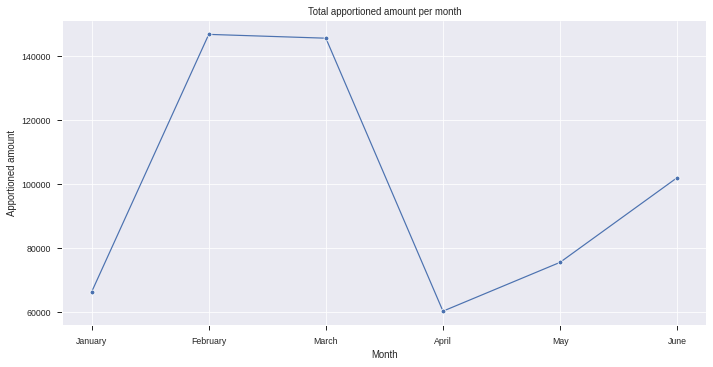

In [11]:
""" Monthly revenue """
# Grouping the apportionment table by month only
apportionment_by_month = apportionment.groupby(apportionment['Date of Invoice'].dt.month).agg({'Final Apportioned Amount' : 'sum'}).reset_index()

apportionment_by_month['Month'] = month_col(apportionment_by_month, 'Date of Invoice')
print(apportionment_by_month)

# Plotting total apportioned amount per month
sns.relplot(data = apportionment_by_month,
                x = 'Month',
                y = 'Final Apportioned Amount',
                ci = None,
                kind = 'line',
                marker = 'o',
                aspect = 2)
plt.ylabel('Apportioned amount')
plt.title('Total apportioned amount per month')
plt.show()

#### 5.2 Case Types Analysis
Before we look into the revenues by case types, lawyers and payment status, we will analyse the `Case Type` column.

In [12]:
# Prints out the unique case types using the unique method
apportionment['Case Type'].unique()

array(['Outgoing Work', 'Incoming Work', 'Protection',
       'Grant Supportable', 'Renewals', 'Commercialisation',
       'General Corporate', 'Dispute Resolution', 'Corporate Secretarial',
       'Miscellaneous', 'General Disputes', nan], dtype=object)

In [13]:
# Describes the final apportionment amount per case type
description = apportionment.groupby('Case Type', as_index = False).agg({'Final Apportioned Amount' : 'describe'})
description

Case Type Final Apportioned Amount                            \
                                             count         mean          std   
0       Commercialisation                      6.0  1583.333333  1708.490423   
1   Corporate Secretarial                     17.0  1203.529412   671.116834   
2      Dispute Resolution                     20.0  3326.972500  6729.327049   
3       General Corporate                      8.0  1072.500000  1517.014065   
4        General Disputes                     16.0  3819.375000  4389.923342   
5       Grant Supportable                     95.0  2222.868526  2460.961843   
6           Incoming Work                    143.0   560.552937   970.952618   
7           Miscellaneous                      3.0   566.666667   700.096034   
8           Outgoing Work                    203.0   475.408867   790.597331   
9              Protection                     59.0   645.866949   729.536179   
10               Renewals                      5.0   432.000000   328.949810   

                                                     
       min       25%       50%        75%       max  
0   500.00   712.310   912.690  1375.0000   5000.00  
1   119.69   600.000  1554.070  1840.0000   1941.75  
2   113.67   925.000  1150.000  1625.0000  28000.00  
3   100.00   115.000   213.945  1438.0275   4000.00  
4    50.00  1387.500  2583.500  3499.7500  14200.00  
5     0.00   580.360  1414.670  2972.0000  14000.00  
6     0.00   166.315   300.000   602.5500   9770.00  
7   126.06   163.030   200.000   786.9700   1373.94  
8    13.12   141.720   250.000   532.0000   8616.89  
9     0.00   240.380   400.000   635.0950   3550.00  
10   13.34   286.660   400.000   560.0000    900.00

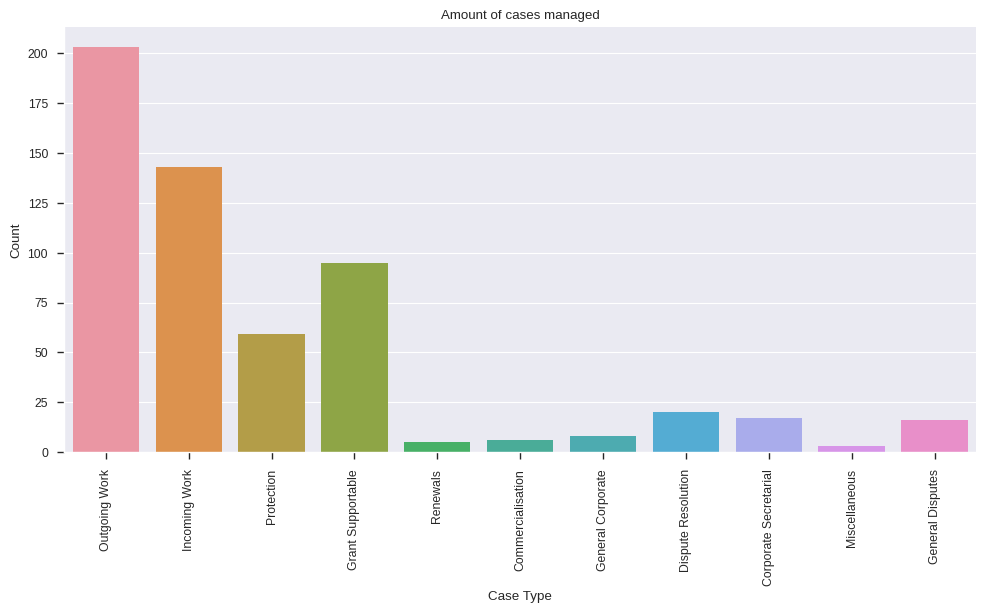

In [14]:
""" Case type count """
# Plot to show amount of cases managed
sns.catplot(data = apportionment,
                x = 'Case Type',
                kind = 'count',
                aspect = 2)
plt.ylabel('Count')
plt.title('Amount of cases managed')
plt.xticks(rotation = 90)
plt.show()

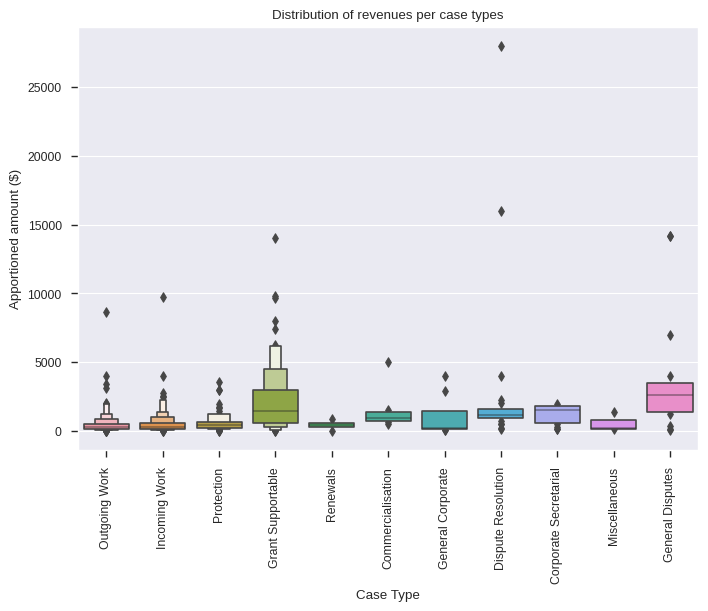

In [15]:
""" Revenue according to each case type wrt month """
# Grouping the apportionment table by month and case type
apportionment_by_month_case = apportionment.groupby([apportionment['Date of Invoice'].dt.month, 'Case Type']).agg({'Final Apportioned Amount' : 'sum'}).reset_index()

apportionment_by_month_case['Month'] = month_col(apportionment_by_month_case, 'Date of Invoice')

""" Revenue per case type """
# Plot to show apportionment ammount per case type
sns.boxenplot(data = apportionment,
                x = 'Case Type',
                y = 'Final Apportioned Amount',
                dodge = True)
plt.title('Distribution of revenues per case types')
plt.ylabel('Apportioned amount ($)')
plt.xticks( rotation = 90)
plt.show()

Because it is difficult to see the differences, we will apply a log scale to the y-axis for visual clarity

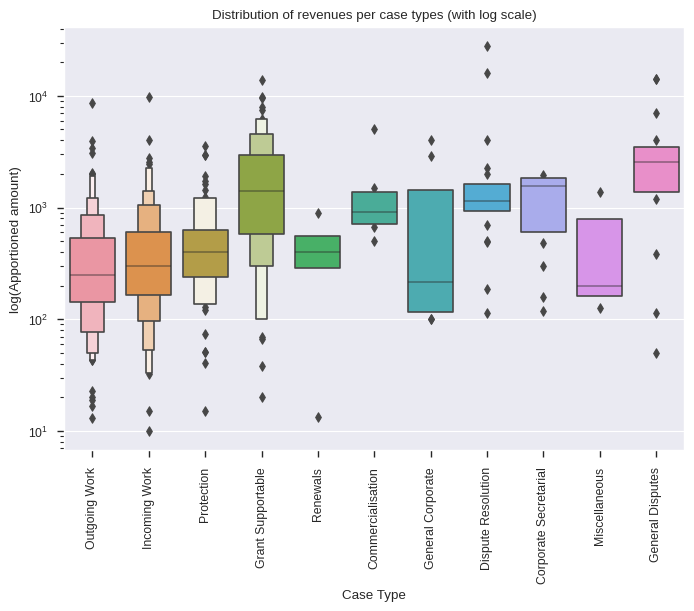

In [16]:
# Improve visual clarity by taking log()
sns.boxenplot(data = apportionment, 
            x = 'Case Type',
            y = 'Final Apportioned Amount')
plt.xticks( rotation = 90)
plt.title('Distribution of revenues per case types (with log scale)')
plt.ylabel('log(Apportioned amount)')
plt.yscale('log')
plt.show()

From the `decription` table and the plots above, we can see that:
- General Disputes has the highest median apportionment ($2583.50)
- General Corporate has the lowest median apportionment ($213.95)
- Dispute Resolution maximum apportionment ($28000)
- The type of case that has been managed the most between January and June is Outgoing Work with a count of 203

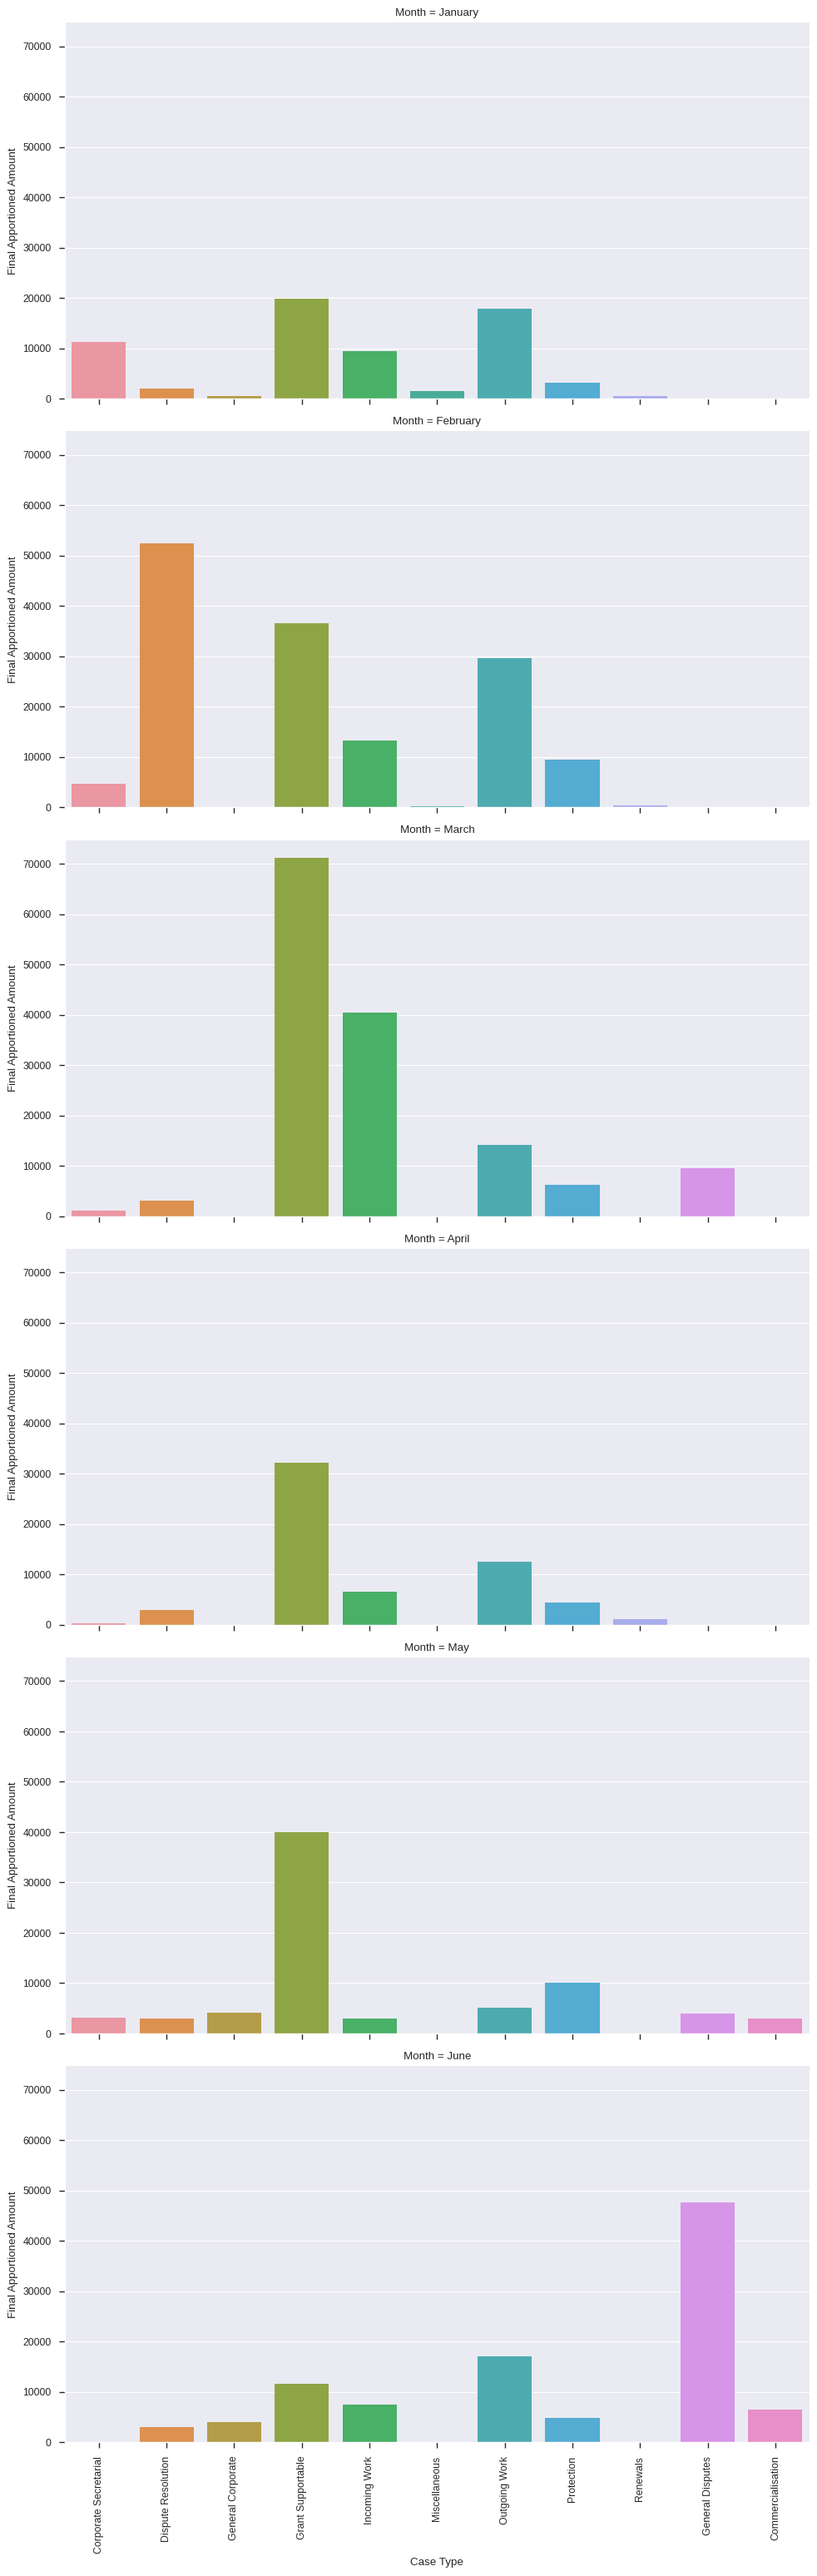

In [17]:
# Grouping the apportionment table by month and case type
apportionment_by_month_case = apportionment.groupby([apportionment['Date of Invoice'].dt.month, 'Case Type']).agg({'Final Apportioned Amount' : 'sum'}).reset_index()

apportionment_by_month_case['Month'] = month_col(apportionment_by_month_case, 'Date of Invoice')

# Plot to show apportionment ammount per case type
sns.catplot(data = apportionment_by_month_case,
                x = 'Case Type',
                y = 'Final Apportioned Amount',
                kind = 'bar',
                ci = None,
                row = 'Month',
                aspect = 2,
                dodge = True)
plt.xticks( rotation = 90)
plt.show()

### 5.3 Lawyer Analysis

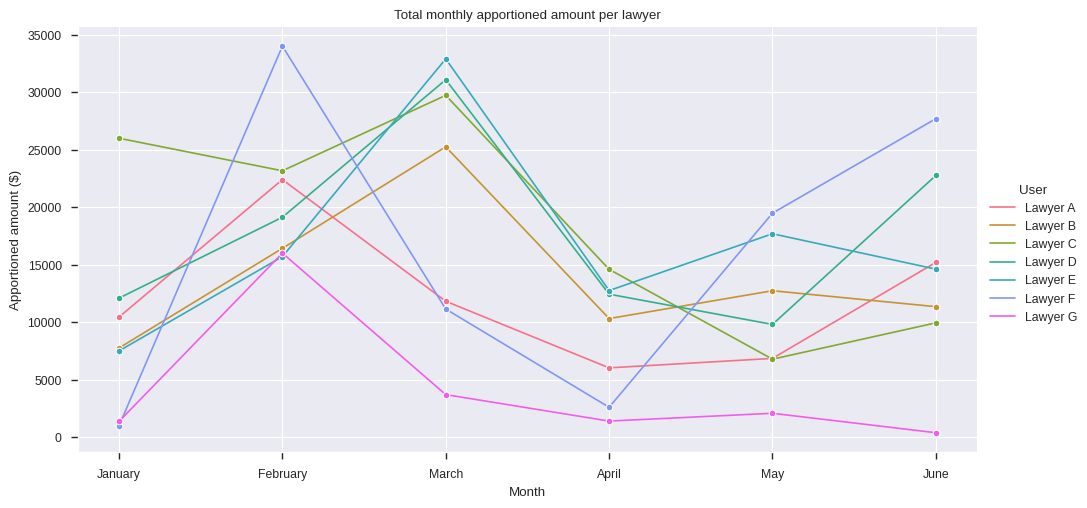

In [18]:
""" Monthly revenue from lawyers """
# Grouping the apportionment table by month and lawyer
apportionment_by_month_lawyer = apportionment.groupby([apportionment['Date of Invoice'].dt.month, 'User']).agg({'Final Apportioned Amount' : 'sum'}).reset_index()

apportionment_by_month_lawyer['Month'] = month_col(apportionment_by_month_lawyer, 'Date of Invoice')

# Plotting total apportioned amount per month by lawyer
sns.relplot(data = apportionment_by_month_lawyer,
            x = 'Month',
            y = 'Final Apportioned Amount',
            ci = None,
            kind = 'line',
            hue = 'User',
            aspect = 2,
            marker = 'o')
plt.ylabel('Apportioned amount ($)')
plt.title('Total monthly apportioned amount per lawyer')
plt.show()

We may be interested to see if there are any specific lawyers who can handle specific cases. To do so we will construct a cross table from the `apportionment` table. 

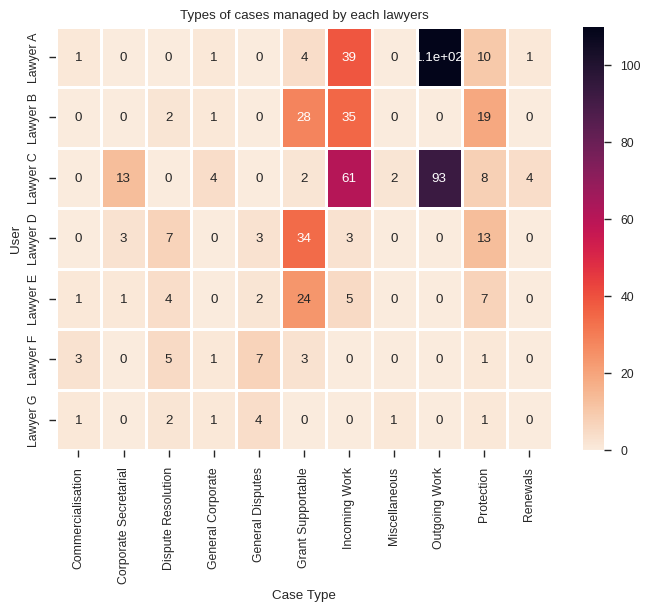

In [19]:
""" Lawyer Specialization """
# Create a crosstable
lawyer_crosstab = pd.crosstab(apportionment['User'], apportionment['Case Type'])
lawyer_crosstab

# Plotting a heatmap to visualize which lawyers can do which cases better(?)
sns.heatmap(lawyer_crosstab,
            cmap = 'rocket_r',
            linewidth = 1,
            linecolor = 'w',
            annot = True)
plt.title('Types of cases managed by each lawyers')
plt.show()

From the heatmap above;
- Commercialisation -> lawyer F
- Corporate Secretarial -> lawyer C
- Dispute resolution -> lawyer D
- General Corporate -> lawyer C
- General Disputes -> lawyer F
- Grant Supportable -> lawyer D
- Incoming Work -> lawyer C
- Outgoing Work -> lawyer A
- Protection -> lawyer B
- Renewals -> lawyer C

The code below will plot the type of cases and their respective apportionment amount according to each lawyers


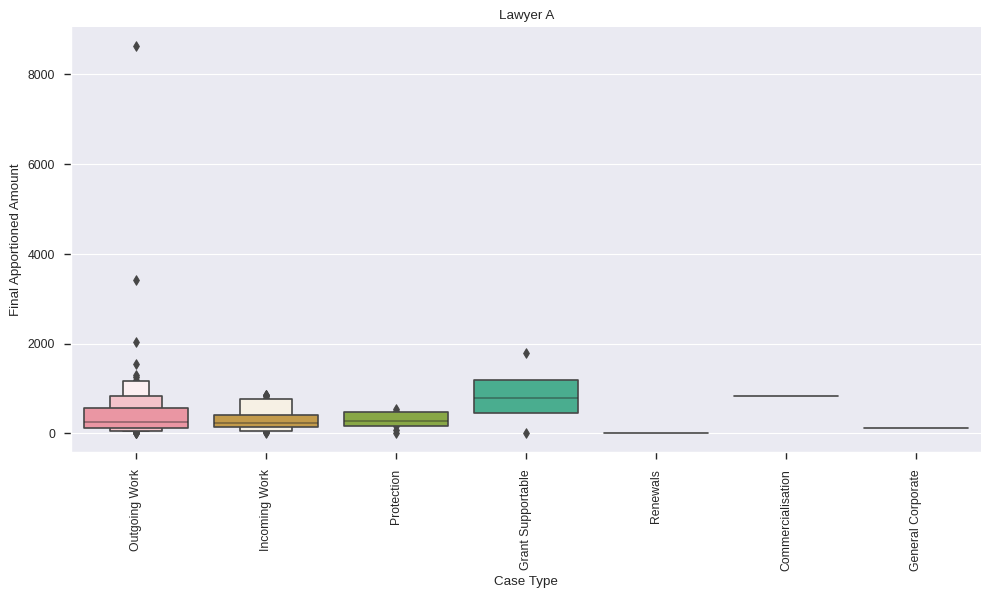

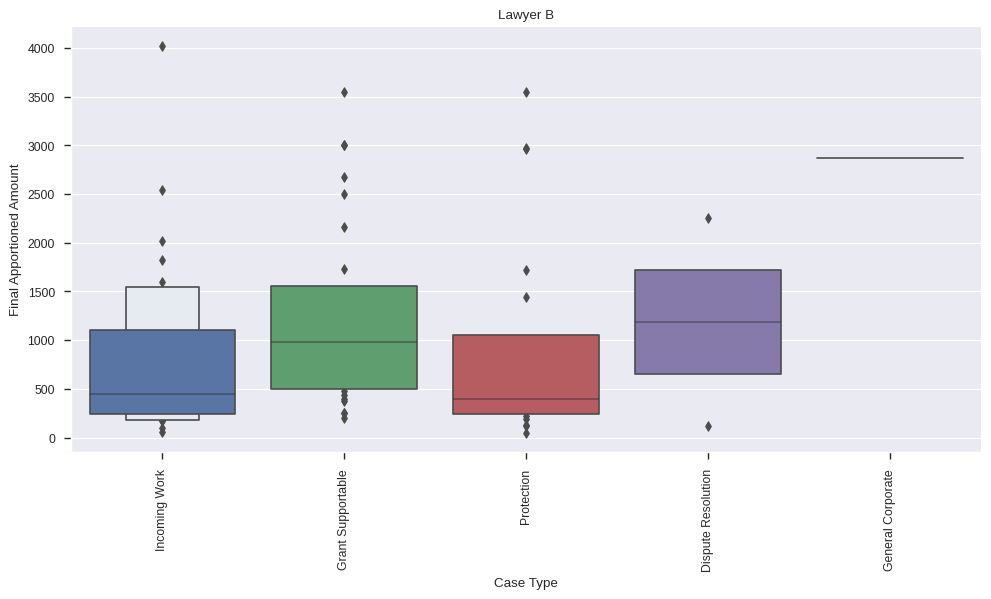

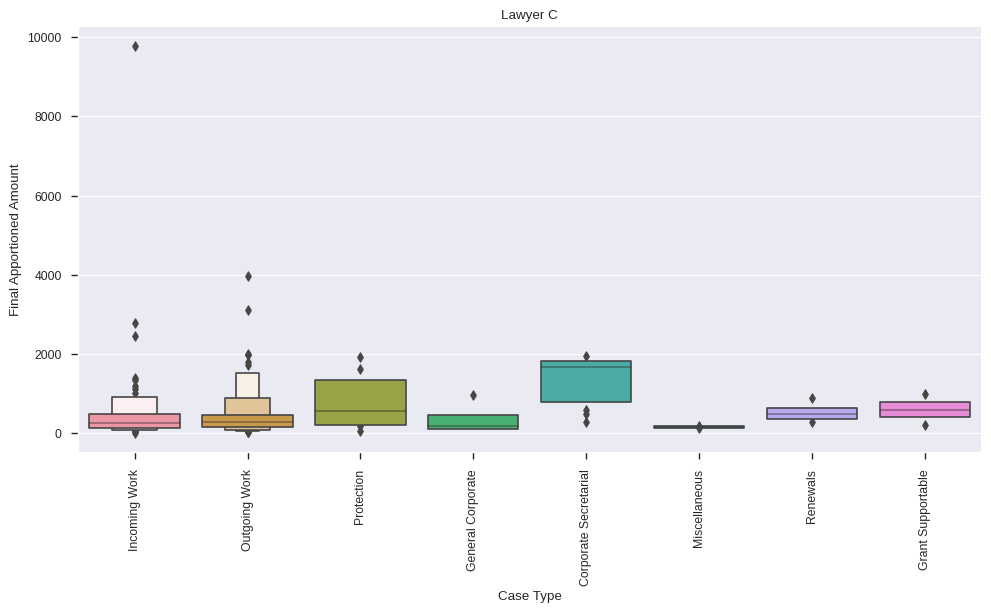

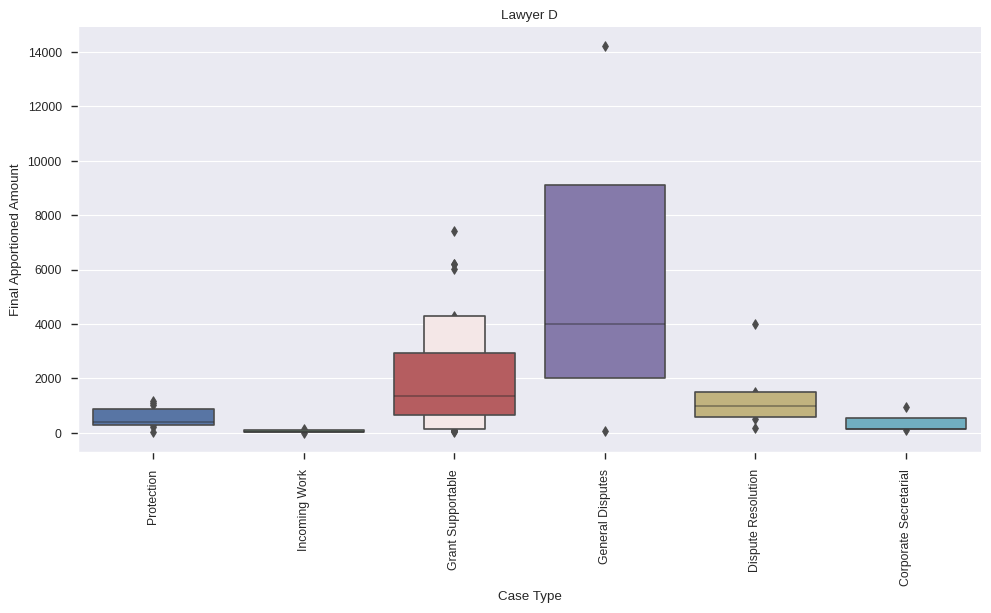

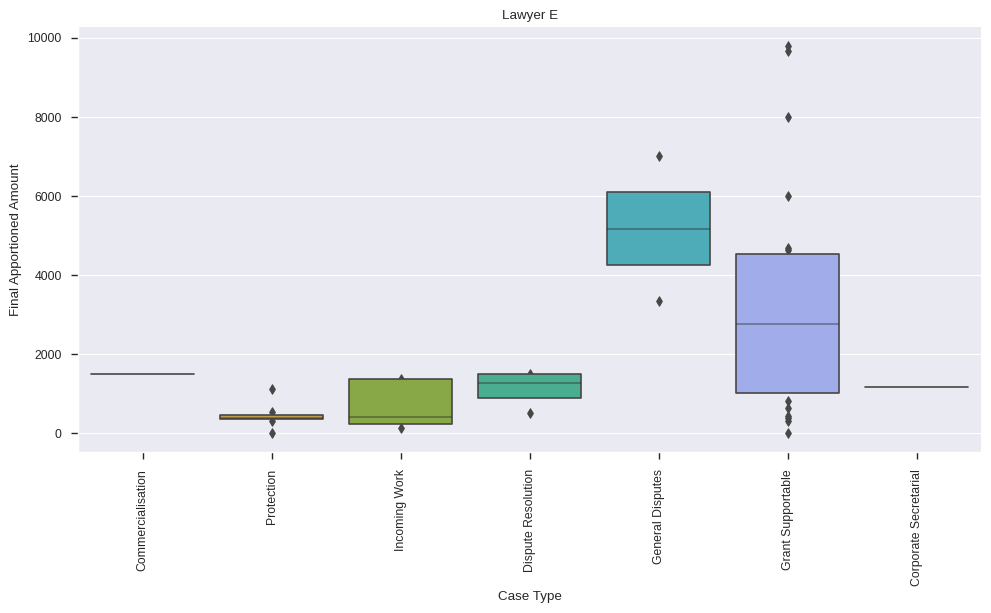

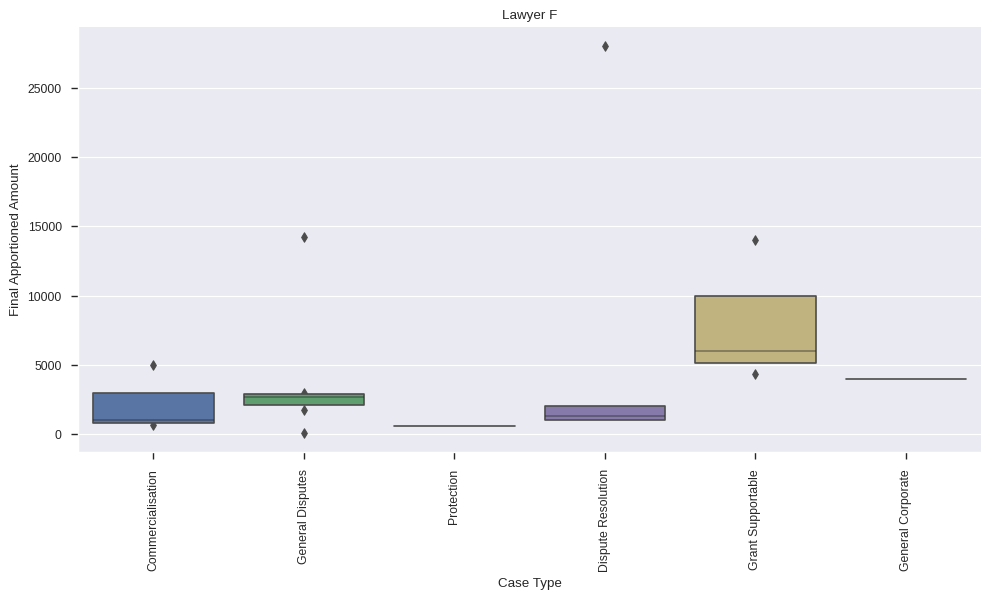

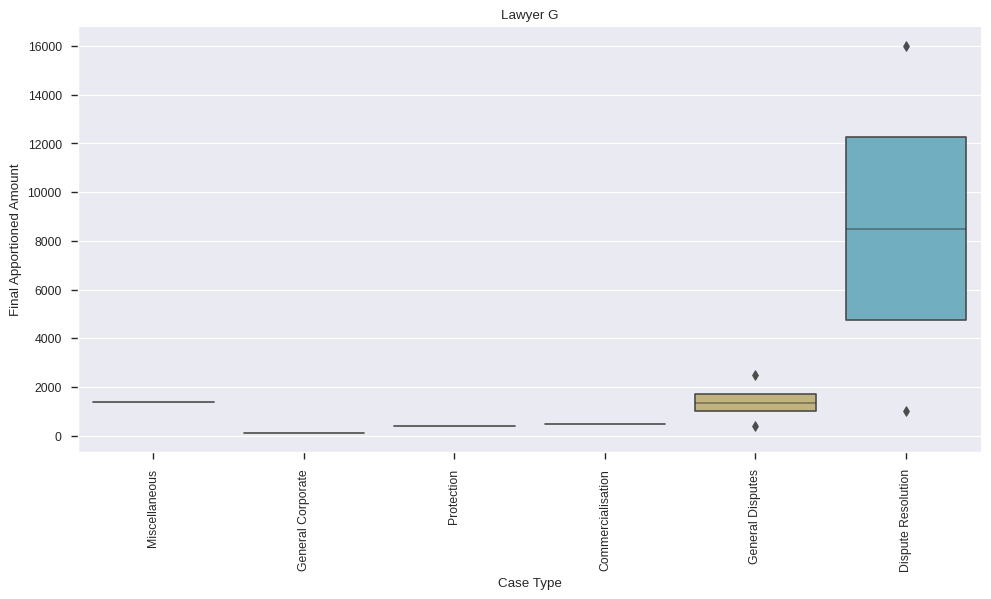

In [43]:
# Initialize a list of lawyers
Lawyers = ['Lawyer A', 'Lawyer B', 'Lawyer C', 'Lawyer D', 'Lawyer E', 'Lawyer F', 'Lawyer G']

# Looping through each lawyers and make a plot
for lawyer in Lawyers:
    l = apportionment[apportionment['User'] == lawyer]
    sns.catplot(data = l, x = 'Case Type', y = 'Final Apportioned Amount', kind = 'boxen', aspect = 2).set(title = lawyer)
    plt.xticks( rotation = 90)
    plt.show()

#### 5.4 Cashflow Issue Analysis

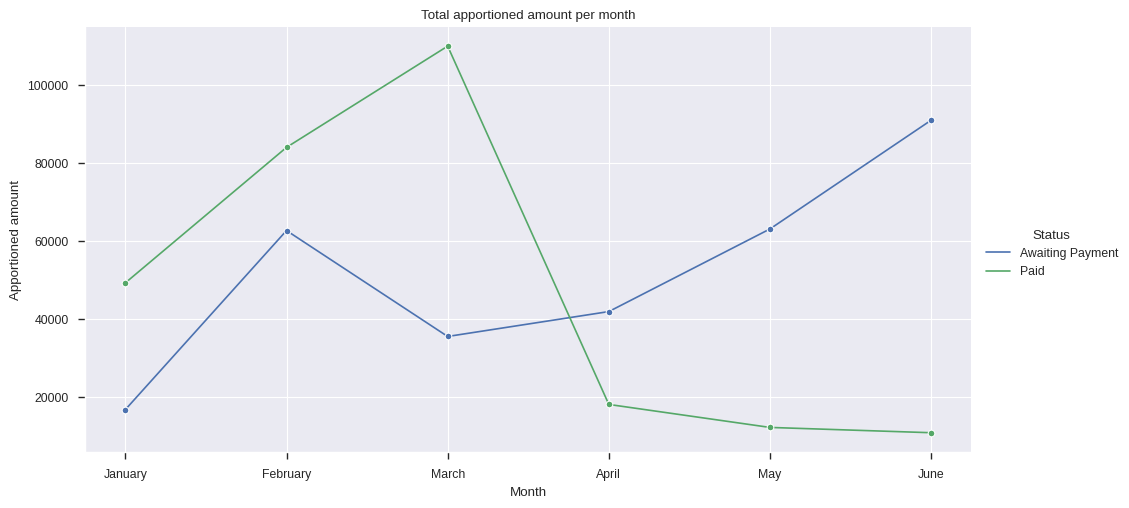

In [22]:
""" Monthly revenue by payment status """
# Total apportioned amount per month by status
apportionment_by_month_status = apportionment.groupby([apportionment['Date of Invoice'].dt.month, 'Status']).agg({'Final Apportioned Amount' : 'sum'}).reset_index()

# Adding an extra column with month names
apportionment_by_month_status['Month'] = apportionment_by_month_status['Date of Invoice'].apply(lambda x : month_name[x])

apportionment_by_month_status

# Plotting total apportioned amount per month by status
sns.relplot(data = apportionment_by_month_status,
            x = 'Month',
            y = 'Final Apportioned Amount',
            ci = None,
            kind = 'line',
            hue = 'Status',
            aspect = 2,
            marker = 'o')
plt.ylabel('Apportioned amount')
plt.title('Total apportioned amount per month')
plt.show()

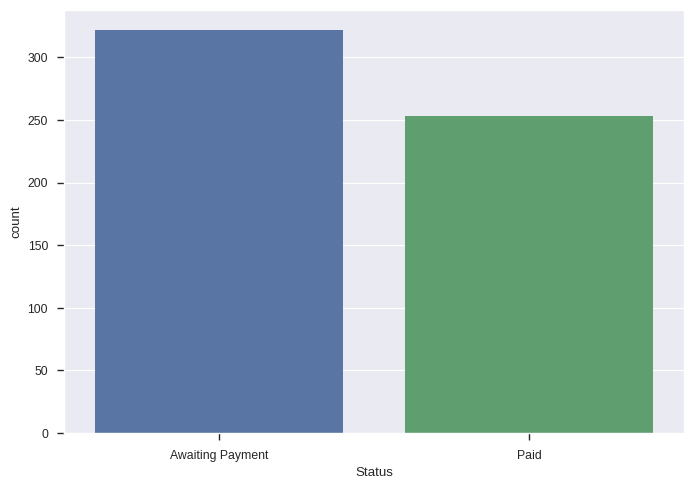

In [23]:
# Plotting a countplot to see how many cases are paid/awaiting payment
fig, ax = plt.subplots()
ax = sns.countplot( x = 'Status', data = apportionment)
plt.show()

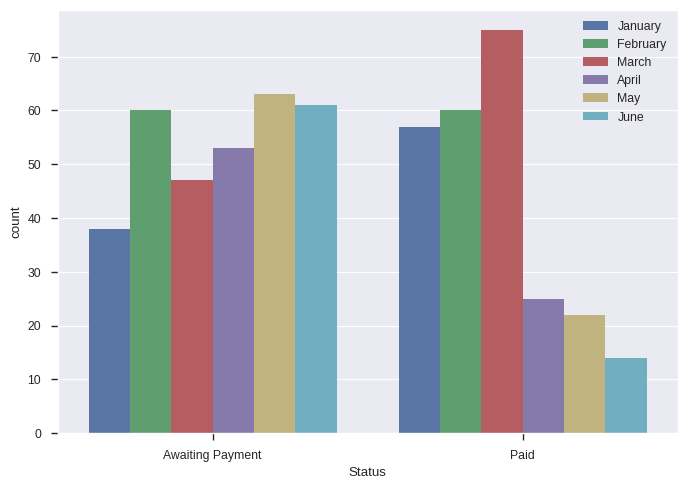

In [24]:
# Plotting a countplot to see how many cases are paid/awaiting payment
sns.countplot( x = 'Status', data = apportionment, hue = apportionment['Date of Invoice'].dt.month)
plt.legend(['January', 'February', 'March', 'April', 'May', 'June'])
plt.show()

Because there exist unpaid apportionment, it would be interesting to see the cumulative sum of the unpaid and paid compared to the overall cumulative apportionment.

In [25]:
# Cumulative sum
apportionment_by_month['Cumulative apportionment'] = apportionment_by_month['Final Apportioned Amount'].cumsum()
paid = apportionment_by_month_status.loc[apportionment_by_month_status['Status'] == 'Paid']
unpaid = apportionment_by_month_status.loc[apportionment_by_month_status['Status'] == 'Awaiting Payment']

paid['Cumulative paid apportionment'] = paid['Final Apportioned Amount'].cumsum()
unpaid['Cumulative unpaid apportionment'] = unpaid['Final Apportioned Amount'].cumsum()



/tmp/ipykernel_4315/3374294021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid['Cumulative paid apportionment'] = paid['Final Apportioned Amount'].cumsum()
/tmp/ipykernel_4315/3374294021.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unpaid['Cumulative unpaid apportionment'] = unpaid['Final Apportioned Amount'].cumsum()


In [27]:
apportionment_by_month

,Date of Invoice,Final Apportioned Amount,Month,Cumulative apportionment
0,1.0,66153.76,January,66153.76
1,2.0,146794.65,February,212948.41
2,3.0,145597.80,March,358546.21
3,4.0,60115.02,April,418661.23
4,5.0,75407.00,May,494068.23
5,6.0,101926.95,June,595995.18


In [28]:
paid

,Date of Invoice,Status,Final Apportioned Amount,Month,Cumulative paid apportionment
1,1.0,Paid,49323.76,January,49323.76
3,2.0,Paid,84059.65,February,133383.41
5,3.0,Paid,110017.80,March,243401.21
7,4.0,Paid,18151.87,April,261553.08
9,5.0,Paid,12258.00,May,273811.08
11,6.0,Paid,10900.00,June,284711.08


In [29]:
unpaid

,Date of Invoice,Status,Final Apportioned Amount,Month,Cumulative unpaid apportionment
0,1.0,Awaiting Payment,16830.00,January,16830.00
2,2.0,Awaiting Payment,62735.00,February,79565.00
4,3.0,Awaiting Payment,35580.00,March,115145.00
6,4.0,Awaiting Payment,41963.15,April,157108.15
8,5.0,Awaiting Payment,63149.00,May,220257.15
10,6.0,Awaiting Payment,91026.95,June,311284.10


[]

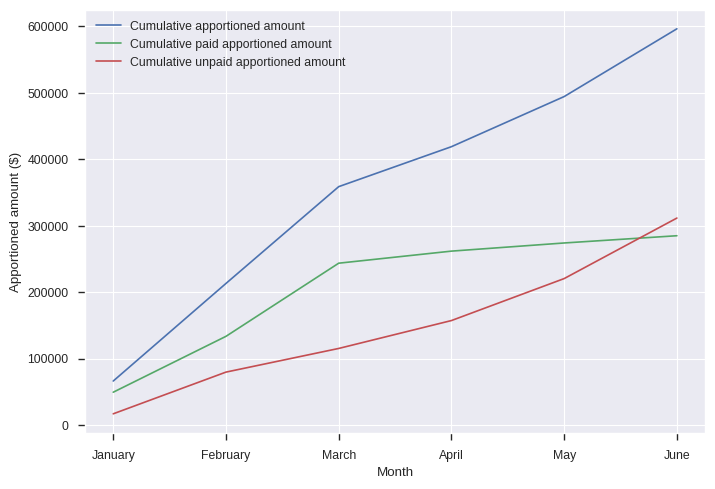

In [26]:
# Plotting cumulative sums of apportionment according to payment status
plt.plot(apportionment_by_month['Month'], apportionment_by_month['Cumulative apportionment'], label = 'Cumulative apportioned amount')
plt.plot(paid['Month'], paid['Cumulative paid apportionment'], label = 'Cumulative paid apportioned amount')
plt.plot(unpaid['Month'], unpaid['Cumulative unpaid apportionment'], label = 'Cumulative unpaid apportioned amount')
plt.ylabel('Apportioned amount ($)')
plt.xlabel('Month')
plt.legend()
plt.plot()

From the tables and the plot above, the total amount of unpaid apportionment is $311,284.10 compared to the total $595,995.18, which means 52.2% of the total apportioned amount between January and June has not been paid to the lawyers.

#### 5.5 Clocked Hour Analysis

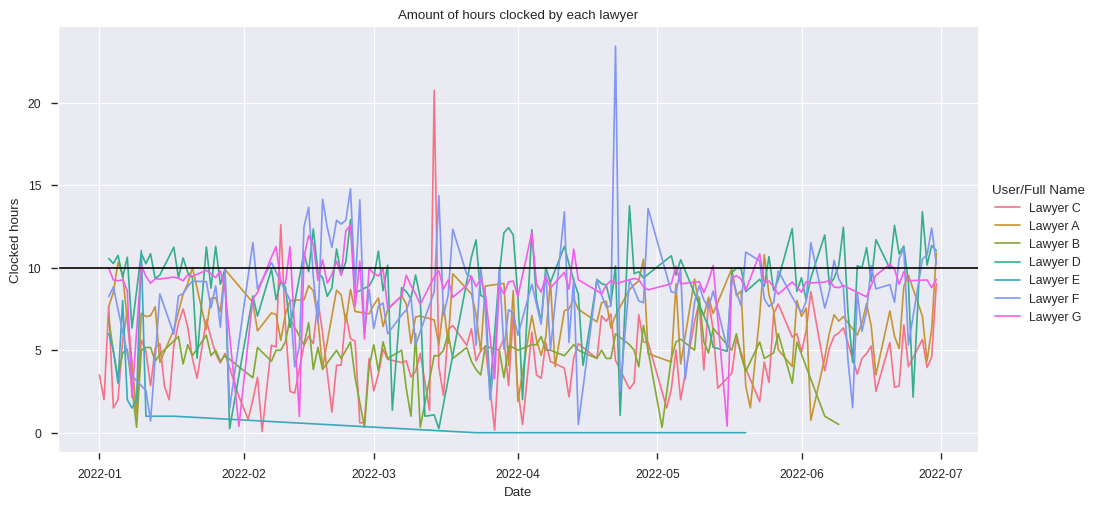

In [30]:
# Plotting hours clocked by each lawyers
sns.relplot(data = hours,
            x = 'Date',
            y = 'Actual Hours',
            kind = 'line',
            aspect = 2,
            ci = None,
            hue = 'User/Full Name')
plt.axhline(y = 10,
            color = 'black',
            linestyle = '-')
plt.ylabel('Clocked hours')
plt.title('Amount of hours clocked by each lawyer')
plt.show()

In [31]:
""" Average clocked hour by each lawyer """
print(round(hours['Actual Hours'].mean(),2))
print(round(hours['Actual Hours'].median(),2))
print(hours.groupby('User/Full Name').agg({'Actual Hours' : 'mean'}))
print(hours.groupby('User/Full Name').agg({'Actual Hours' : 'median'}))

7.13
7.56
                Actual Hours
User/Full Name              
Lawyer A            7.089345
Lawyer B            4.658435
Lawyer C            4.709245
Lawyer D            8.972824
Lawyer E            3.378492
Lawyer F            8.422337
Lawyer G            9.010226
                Actual Hours
User/Full Name              
Lawyer A              7.2590
Lawyer B              5.0000
Lawyer C              4.8000
Lawyer D              9.4028
Lawyer E              2.0000
Lawyer F              8.4529
Lawyer G              9.2053


#### 5.6 Lawyer's Target Revenue
Each lawyer has their own cost to company (monthly salary) which can be observed under the `ctc` table. The revenue targets are calculated based on multipliers of their monthly salary.

In [32]:
# Merging the two tables
kpi = apportionment_by_month_lawyer.merge(ctc, how='outer', on = 'User')

# Initializing condition list, choicelist and default for np.select function
condlist = [kpi['Final Apportioned Amount'] > kpi['Mthly 4X'],
            kpi['Final Apportioned Amount'] > kpi['Mthly 3X'],
            kpi['Final Apportioned Amount'] > kpi['Mthly 2X'],
            kpi['Final Apportioned Amount'] > kpi['Mthly 1X']]

choicelist = ['> 4X', '> 3X', '> 2X', '> 1X']

default = 'Not met'

kpi['kpi'] = np.select(condlist, choicelist, default)

kpi

,Date of Invoice,User,Final Apportioned Amount,Month,Mthly 1X,Mthly 2X,Mthly 3X,Mthly 4X,kpi
0,1.0,Lawyer A,10444.39,January,3600.00,7200.00,10800.00,14400.00,> 2X
1,2.0,Lawyer A,22396.51,February,3600.00,7200.00,10800.00,14400.00,> 4X
2,3.0,Lawyer A,11818.57,March,3600.00,7200.00,10800.00,14400.00,> 3X
3,4.0,Lawyer A,6027.32,April,3600.00,7200.00,10800.00,14400.00,> 1X
4,5.0,Lawyer A,6849.40,May,3600.00,7200.00,10800.00,14400.00,> 1X
5,6.0,Lawyer A,15196.03,June,3600.00,7200.00,10800.00,14400.00,> 4X
6,1.0,Lawyer B,7755.00,January,6284.43,12568.86,18853.29,25137.72,> 1X
7,2.0,Lawyer B,16416.40,February,6284.43,12568.86,18853.29,25137.72,> 2X
8,3.0,Lawyer B,25244.85,March,6284.43,12568.86,18853.29,25137.72,> 4X
9,4.0,Lawyer B,10312.57,April,6284.43,12568.86,18853.29,25137.72,> 1X


In [33]:
# Subsetting the data frame according to each lawyers
def kpidf(x):
    return kpi.loc[kpi['User'] == x]

a_kpi = kpidf('Lawyer A')
b_kpi = kpidf('Lawyer B')
c_kpi = kpidf('Lawyer C')
d_kpi = kpidf('Lawyer D')
e_kpi = kpidf('Lawyer E')
f_kpi = kpidf('Lawyer F')
g_kpi = kpidf('Lawyer G')

# Creating a function to plot lawyer's monthly revenue and their target revenues
def kpiplot(df, ctc, letter):
    sns.relplot(x = 'Month',
                y = 'Final Apportioned Amount',
                kind = 'line',
                marker = 'X',
                aspect = 2,
                data = df)
    plt.axhline(y = ctc, linestyle = '-', alpha = 0.5, color = 'g', label = "1 * Cost to Company")
    plt.axhline(y = 2 * ctc, linestyle = '--', alpha = 0.5, color = 'g', label = "2 * Cost to Company")
    plt.axhline(y = 3 * ctc, linestyle = '-.', alpha = 0.5, color = 'g', label = "3 * Cost to Company")
    plt.axhline(y = 4 * ctc, linestyle = ':', alpha = 0.5, color = 'g', label = "4 * Cost to Company")
    plt.legend()
    plt.title('Lawyer ' + str(letter) + '\'s apportioned amount and revenue targets')
    plt.ylabel('Apportioned amount ($)')
    return plt.show()

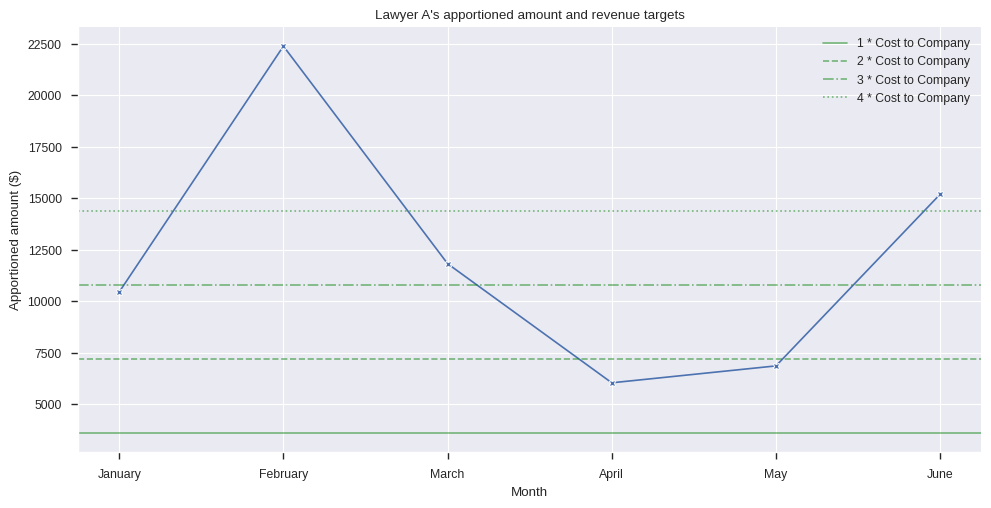

In [34]:
kpiplot(a_kpi, 3600, 'A')

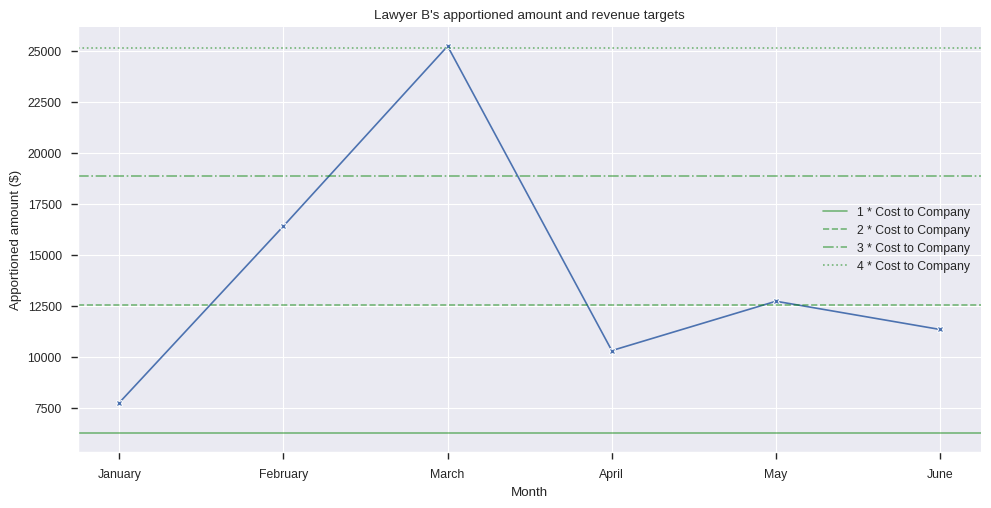

In [35]:
kpiplot(b_kpi, 6284.43, 'B')

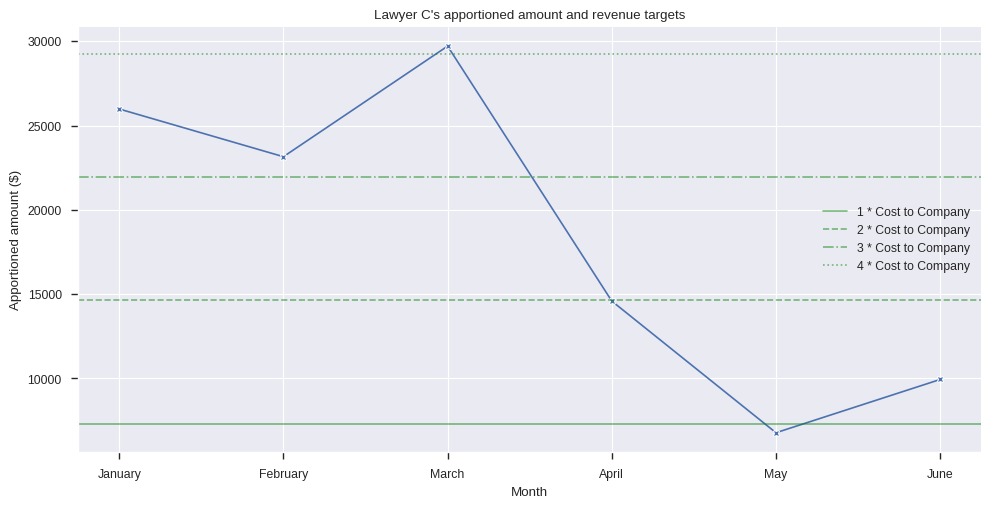

In [36]:
kpiplot(c_kpi, 7320, 'C')

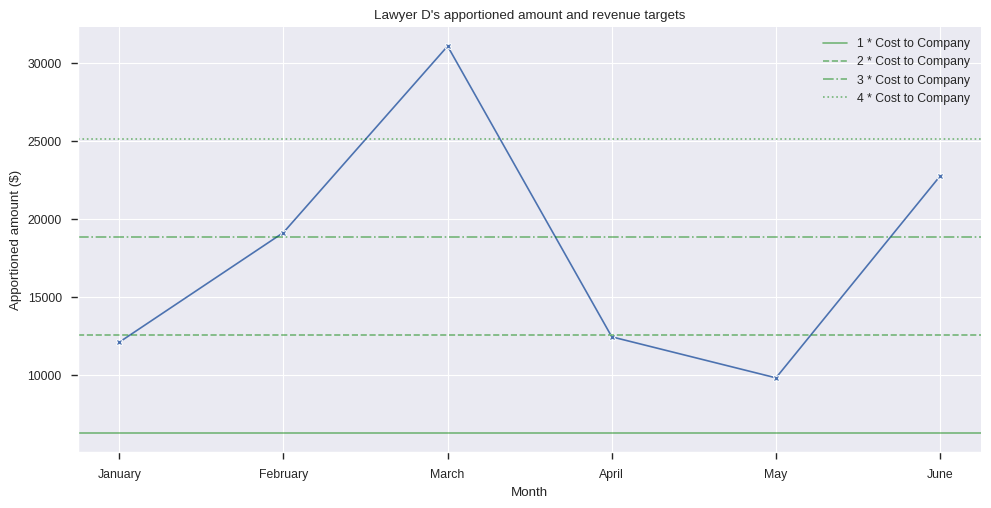

In [37]:
kpiplot(d_kpi, 6284.43, 'D')

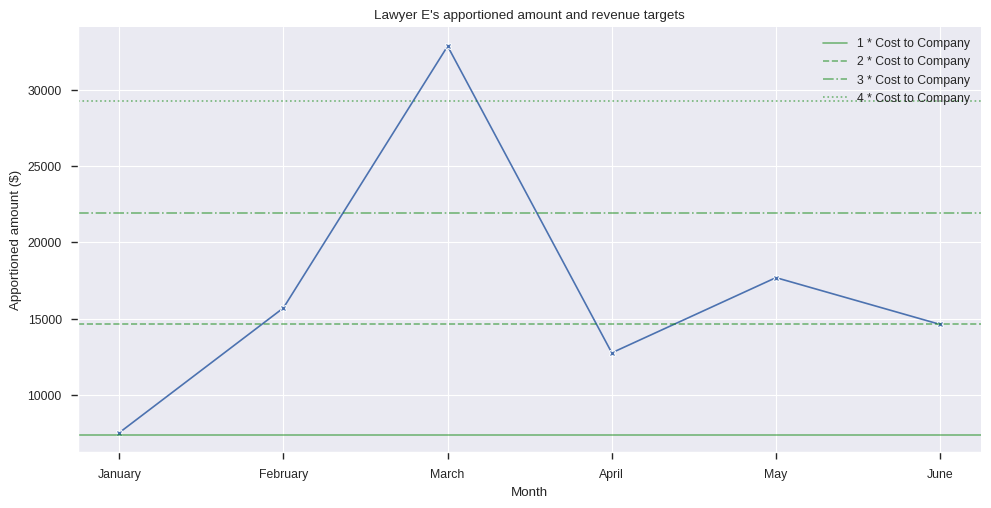

In [38]:
kpiplot(e_kpi, 7320, 'E')

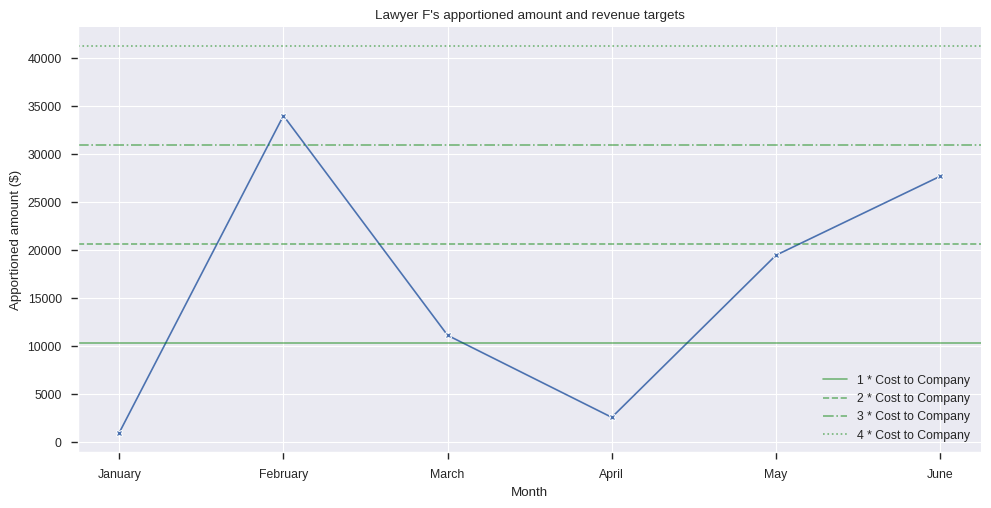

In [39]:
kpiplot(f_kpi, 10308.75, 'F')

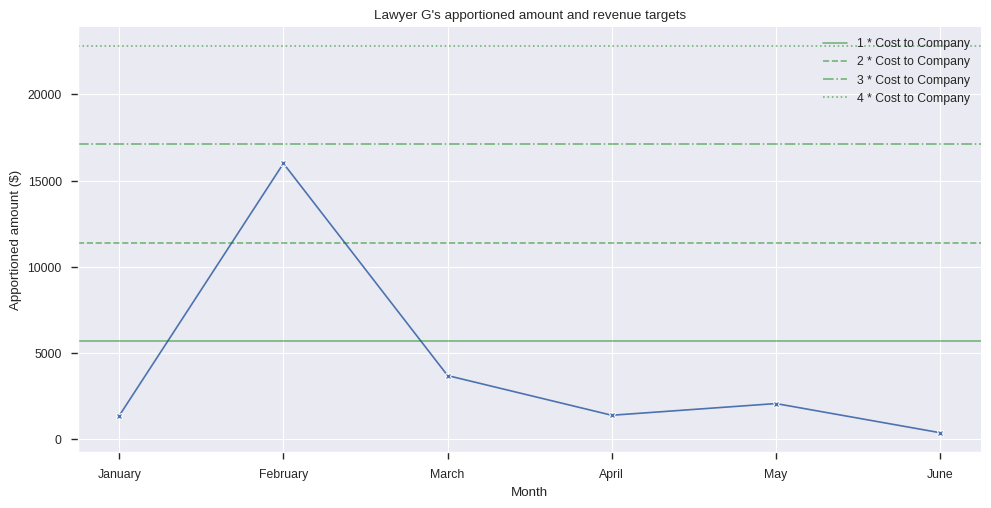

In [40]:
kpiplot(g_kpi, 5699.43, 'G')

#### 5.7 Does clocked hours and apportioned amount a good indication of lawyer's productivity?

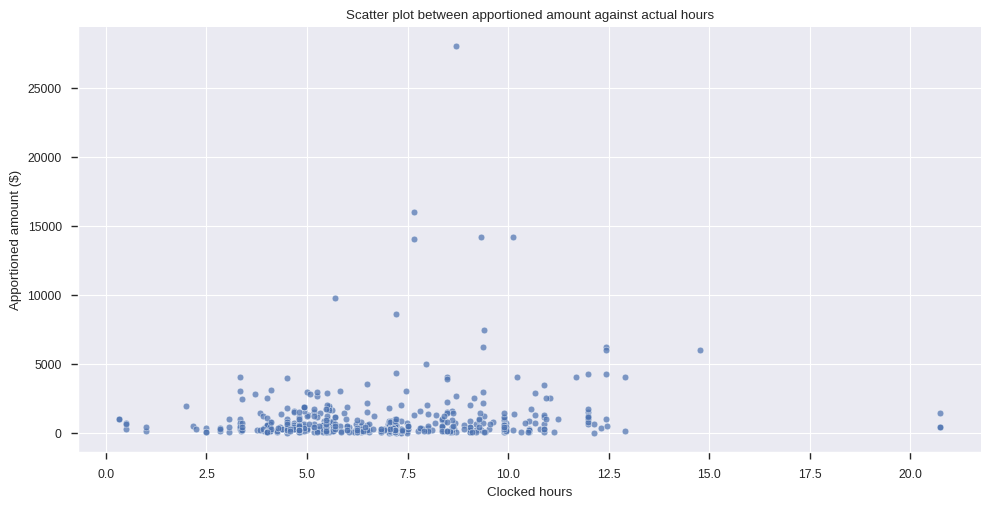

In [41]:
""" Correlation between clocked hour and apportioned amount """ # double check the join
# Merging apportionment table and hours table to investigate relationship between clocked hours and apportioned amount
apportionment_hours = apportionment.merge(hours, left_on = ['Date of Invoice', 'User'], right_on = ['Date', 'User/Full Name'], how = 'outer', suffixes = ['_a','_h'])

# Dropping redudant columns
apportionment_hours = apportionment_hours.drop(['Date', 'User/Full Name'], axis = 1)

# Renaming the column Date of Invoice to Date
apportionment_hours['Date'] = pd.to_datetime(apportionment_hours['Date of Invoice'])

# Scatter plot between final apportioned amount and actual hours
sns.relplot(data = apportionment_hours,
            y = 'Final Apportioned Amount',
            x = 'Actual Hours', 
            aspect = 2, 
            kind = 'scatter',
            alpha = 0.7)
plt.title('Scatter plot between apportioned amount against actual hours')
plt.xlabel('Clocked hours')
plt.ylabel('Apportioned amount ($)')
plt.show()

In [42]:
# Correlation between final apportioned amount and actual hours
print('Correlation between clocked hours and apportioned amount: ' + str(round(apportionment_hours['Final Apportioned Amount'].corr(apportionment_hours['Actual Hours']),2)))


Correlation between clocked hours and apportioned amount: 0.14


The above correlation test shows that the final apportioned amount and the actual hours has a very weak positive relationship.

### 6. Recommendations
- To pay the remaining unpaid apportionment
    - Before the lawyers loses motivation and productivity
- To assign more cases to Lawyer G
    - To ensure Lawyer G can achieve their revenue targets
- To reduce the clocked hour target
    - And to re-design key performance indicator evaluation


### 7. Conclusions
*** insert text